<a href="https://colab.research.google.com/github/chiru30/COMP-6321-Machine-Learning/blob/main/major%20assignment/question%203/major_assignment1_q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Regression

In [2]:
url = "https://raw.githubusercontent.com/chiru30/COMP-6321-Machine-Learning/main/major%20assignment/question%201/Health_Insurance_Dataset.csv"

df1 = pd.read_csv(url)
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df1.duplicated().sum()


1

In [4]:
df1=df1.drop_duplicates()
df1.shape

(1337, 7)

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data_encoded = df1.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'object' else x)

data_encoded.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [6]:
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import random

# pytorch tensors
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).reshape(-1, 1)

X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).reshape(-1, 1)

In [10]:
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.fc(x)

#loss and optimizer
input_dim = X_train.shape[1]
model = RegressionModel(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# train the model
def train_model(model, X_train, y_train, criterion, optimizer, num_epochs=100):
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


num_epochs = 100
train_model(model, X_train, y_train, criterion, optimizer, num_epochs)

# Evaluate on test set
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    test_loss = criterion(y_pred, y_test)
    print(f'Test Loss: {test_loss:.4f}')

# Define a function for early stopping
def early_stopping(train_losses, patience=5):
    if len(train_losses) < patience:
        return False
    for i in range(1, patience + 1):
        if train_losses[-i] < train_losses[-i - 1]:
            return False
    return True

train_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    if early_stopping(train_losses):
        print(f'Early stopping at epoch {epoch+1}')
        break

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    test_loss = criterion(y_pred, y_test)
    print(f'Test Loss: {test_loss:.4f}')



Epoch [10/100], Loss: 0.8270
Epoch [20/100], Loss: 0.6493
Epoch [30/100], Loss: 0.4506
Epoch [40/100], Loss: 0.2911
Epoch [50/100], Loss: 0.2239
Epoch [60/100], Loss: 0.1994
Epoch [70/100], Loss: 0.1797
Epoch [80/100], Loss: 0.1688
Epoch [90/100], Loss: 0.1614
Epoch [100/100], Loss: 0.1561
Test Loss: 0.1867
Epoch [10/100], Loss: 0.1523
Epoch [20/100], Loss: 0.1494
Epoch [30/100], Loss: 0.1471
Epoch [40/100], Loss: 0.1452
Epoch [50/100], Loss: 0.1435
Epoch [60/100], Loss: 0.1418
Epoch [70/100], Loss: 0.1404
Epoch [80/100], Loss: 0.1390
Epoch [90/100], Loss: 0.1377
Epoch [100/100], Loss: 0.1366
Test Loss: 0.1786


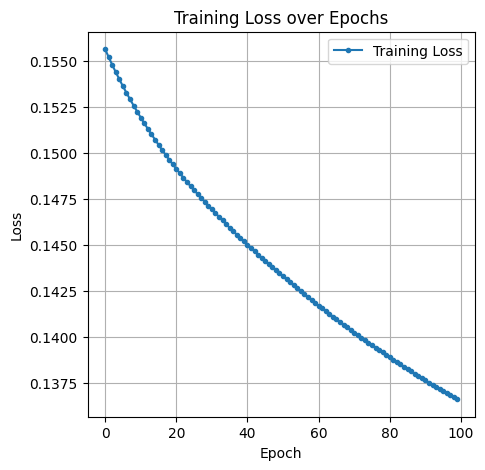

In [11]:
import matplotlib.pyplot as plt

# Plot the training loss
plt.figure(figsize=(5, 5))
plt.plot(range(len(train_losses)), train_losses, label='Training Loss', marker='.')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Classification

In [12]:
url = "https://raw.githubusercontent.com/chiru30/COMP-6321-Machine-Learning/main/major%20assignment/question%202/lung_cancer_dataset.csv"

df2 = pd.read_csv(url)
df2.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [13]:
df2.duplicated().sum()

33

In [14]:
df2=df2.drop_duplicates()
df2.shape

(276, 16)

In [15]:
label_encoder = LabelEncoder()
df2['GENDER'] = label_encoder.fit_transform(df2['GENDER'])
df2['LUNG_CANCER'] = label_encoder.fit_transform(df2['LUNG_CANCER'])

In [16]:
X1 = df2.drop('LUNG_CANCER', axis=1)
y1 = df2['LUNG_CANCER']
X1.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:

X_trn = torch.tensor (X_train, dtype=torch.float32)
y_trn = torch.tensor (y_train.values, dtype=torch.float32).reshape(-1,1)
X_tst= torch.tensor (X_test, dtype=torch.float32)
y_tst= torch.tensor (y_test.values, dtype=torch.float32).reshape(-1,1)


In [20]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(15, 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

model = Net()


criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 100
for epoch in range(num_epochs):

    outputs = model(X_trn)


    loss = criterion(outputs, y_trn)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
with torch.no_grad():
    model.eval()
    test_outputs = model(X_tst)
    predicted = (test_outputs >= 0.5).float()

# Calculate accuracy on the test set
accuracy = (predicted == y_tst).sum().item() / len(y_tst)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch [10/100], Loss: 0.6436
Epoch [20/100], Loss: 0.5379
Epoch [30/100], Loss: 0.4415
Epoch [40/100], Loss: 0.3619
Epoch [50/100], Loss: 0.3064
Epoch [60/100], Loss: 0.2695
Epoch [70/100], Loss: 0.2426
Epoch [80/100], Loss: 0.2212
Epoch [90/100], Loss: 0.2037
Epoch [100/100], Loss: 0.1879
Test Accuracy: 91.07%
